# American Sign Language (ASL) Image Recognition using Deep Learning

## Overview

This Jupyter Notebook was created as part of our capstone project for the Master's in Data Science at Drexel University.  The capstone spans two courses.  This portion is for DSCI 591: Capstone I, which contains the data acquisition, pre-processing, and EDA portions of a data science workflow.

The goal of this project was to use deep learning to accuracy identify the different hand signs of the ASL alphabet.  We created our own dataset by taking 30 second videos of each hand sign and splitting the video into individual frames.  The images were then cropped, converted to grayscale, and then converted to `.csv` files.  These steps were accomplished using the respective Python scripts on our [Github](https://github.com/zachcarlson/ASLImageRecognition) page.

A recorded presentation of our pre-processing pipeline is available [here](https://drive.google.com/file/d/1VBGQmtTYzJHX6AOYr2WLUZMfGGAYYMrW/view?usp=sharing).

## Load Functions/Packages

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [22]:
def rename_columns(df, num_cols=32401):
    '''
    Returns a DF with renamed columns (replaces 0, 1, 2 with label, pixel1, pixel2, etc.)
    '''
    col_names = ["pixel"+str(i) for i in range(num_cols)]
    col_names[0] = "label"
    df.columns = col_names
    return df

In [58]:
def convert_to_image(df, image_num):
    image = df.iloc[image_num, :]
    image = image.to_numpy().reshape(240, 135)
    return image

In [61]:
def print_mean_image(df):
    feature_means = df.mean(axis=0,numeric_only=True).to_numpy()
    feature_means = feature_means.reshape(240, 135)
    plt.imshow(feature_means)
    plt.gray()

## Import Data

We'll load in the pre-processed images stored in `.csv` files:

In [7]:
images = pd.read_csv('./CSV_Files/letter_A/A_img_pixels.csv', header=None)
images.head()

,0,1,2,3,4,5,6,7,8,9,...,32391,32392,32393,32394,32395,32396,32397,32398,32399,32400
0,A,119,119,118,119,119,120,120,121,121,...,137,137,137,136,136,136,135,135,134,135
1,A,119,119,118,119,119,120,120,121,121,...,137,137,137,137,136,136,135,135,135,135
2,A,119,119,118,119,119,120,120,121,121,...,137,137,137,136,136,136,135,135,134,135
3,A,119,119,118,119,119,120,120,121,121,...,137,137,137,137,136,136,135,135,135,135
4,A,119,119,118,118,120,120,120,121,121,...,138,138,138,139,138,136,136,135,136,135


In [32]:
letter_A = rename_columns(images)
letter_A = letter_A.iloc[:, 1:]
letter_A.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel32391,pixel32392,pixel32393,pixel32394,pixel32395,pixel32396,pixel32397,pixel32398,pixel32399,pixel32400
0,119,119,118,119,119,120,120,121,121,121,...,137,137,137,136,136,136,135,135,134,135
1,119,119,118,119,119,120,120,121,121,121,...,137,137,137,137,136,136,135,135,135,135
2,119,119,118,119,119,120,120,121,121,121,...,137,137,137,136,136,136,135,135,134,135
3,119,119,118,119,119,120,120,121,121,121,...,137,137,137,137,136,136,135,135,135,135
4,119,119,118,118,120,120,120,121,121,121,...,138,138,138,139,138,136,136,135,136,135


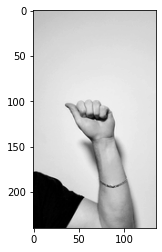

In [60]:
image_1 = convert_to_image(df=letter_A, image_num=1)
plt.imshow(image_1)
plt.gray()

In [46]:
feature_means = letter_A.mean(axis=0,numeric_only=True).to_numpy()

In [47]:
feature_means = feature_means.reshape(240, 135)
feature_means

array([[108.37875536, 108.73497854, 109.04828326, ..., 121.61266094,
        121.52145923, 121.50321888],
       [109.05150215, 109.40450644, 109.75965665, ..., 121.9806867 ,
        121.87875536, 121.8251073 ],
       [109.86909871, 110.10515021, 110.49463519, ..., 122.42703863,
        122.35085837, 122.28111588],
       ...,
       [  1.33261803,   1.38733906,   1.36695279, ..., 132.71030043,
        132.65772532, 132.53218884],
       [  1.34012876,   1.34012876,   1.31008584, ..., 132.62017167,
        132.51609442, 132.42274678],
       [  1.26824034,   1.31759657,   1.31437768, ..., 132.46244635,
        132.36373391, 132.24034335]])

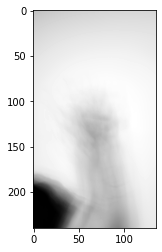

In [62]:
print_mean_image(letter_B)